In [1]:
library(plyr)
library(ggplot2)
library(cluster)
library(lattice)
library(graphics)
library(grid)


Attaching package: ‘ggplot2’

The following object is masked _by_ ‘.GlobalEnv’:

    diamonds



In [2]:
data=read.csv("..../grades_km_input.csv")
head(data)

Student,English,Math,Science
1,99,96,97
2,99,96,97
3,98,97,97
4,95,100,95
5,95,96,96
6,96,97,96


In [3]:
kmdata=as.matrix(data[,c("Student","English","Math","Science")])
km_data=kmdata[,2:4]
head(km_data)

English,Math,Science
99,96,97
99,96,97
98,97,97
95,100,95
95,96,96
96,97,96


In [4]:
# The k-means algorithm is used to identify clusters for k = 1, 2, …, 15. For each value of k, the WSS is calculated.
wss <- numeric(15)
for (k in 1:15) 
    wss[k] <- sum(kmeans(km_data, centers=k, nstart=20)$withinss)

For each k, the option nstart=20 specifies that the k-means algorithm will be repeated
25 times, each starting with k random initial centroids

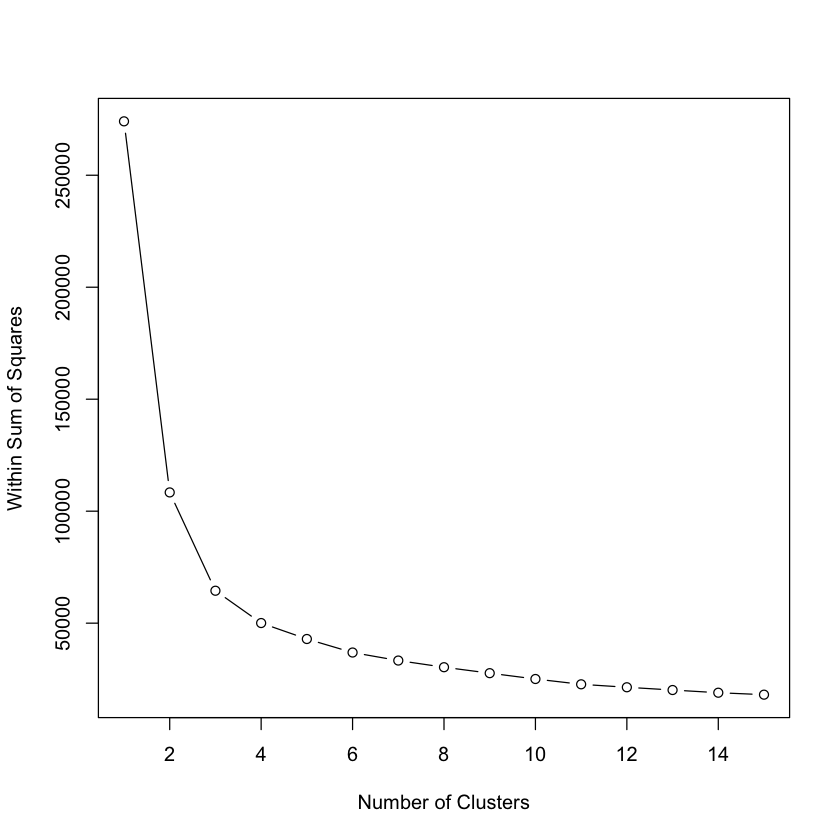

In [5]:
# Each k value is plotted against number of centroids
plot(1:15, wss, type="b", xlab="Number of Clusters", ylab="Within Sum of Squares")

WSS is greatly reduced when k increases from one to two. Another substantial reduction in WSS occurs at k = 3. 
However, the improvement in WSS is fairly linear for k > 3. Therefore, the k-means analysis will be conducted for k = 3.

In [6]:
km = kmeans(km_data, 3, nstart=20)
km

K-means clustering with 3 clusters of sizes 158, 218, 244

Cluster means:
   English     Math  Science
1 97.21519 93.37342 94.86076
2 73.22018 64.62844 65.84862
3 85.84426 79.68033 81.50820

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 1 1 3 3 1 3 3 3
[186] 1 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[260] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[297] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[334] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

To check kmeans stored in km are equivalent to wss results

In [7]:
c(wss[3] , sum(km$withinss))

[1] 64483.06 64483.06

Plot clusters

In [8]:
#prepare the student data and clustering results for plotting
df = as.data.frame(kmdata[,2:4])
df$cluster = factor(km$cluster)
centers=as.data.frame(km$centers)

In [9]:
g1= ggplot(data=df, aes(x=English, y=Math, color=cluster )) + geom_point() + theme(legend.position="right") +
    geom_point(data=centers,aes(x=English,y=Math, color=as.factor(c(1,2,3))),size=10, alpha=.3, show.legend=FALSE)

In [10]:
g2 =ggplot(data=df, aes(x=English, y=Science, color=cluster )) + geom_point() +
geom_point(data=centers,aes(x=English,y=Science, color=as.factor(c(1,2,3))),size=10, alpha=.3, show.legend=FALSE)

In [11]:
g3 = ggplot(data=df, aes(x=Math, y=Science, color=cluster )) + geom_point() +
geom_point(data=centers, aes(x=Math,y=Science, color=as.factor(c(1,2,3))), size=10, alpha=.3, show.legend=FALSE)

In [12]:
tmp = ggplot_gtable(ggplot_build(g1))

In [13]:
#library(gridExtra)
grid.arrrange(arrangeGrob(g1 + theme(legend.position="none"),
                          g2 + theme(legend.position="none"),
                          g3 + theme(legend.position="none"),
                          main ="High School Student Cluster Analysis",ncol=1))

ERROR: Error in eval(expr, envir, enclos): could not find function "grid.arrrange"


In [14]:
fit<-kmeans(km_data, 5)
aggregate(km_data,by=list(fit$cluster),FUN=mean)
# append cluster assignment
mydata <- data.frame(km_data, fit$cluster)

Group.1,English,Math,Science
1,78.75281,79.48315,79.31461
2,63.35714,65.75000,64.57143
3,89.81646,80.12025,82.96835
4,97.33766,93.62338,94.96104
5,79.67407,63.77778,66.77778


In [15]:
install.packages("fpc")

also installing the dependencies ‘mclust’, ‘prabclus’, ‘diptest’, ‘mvtnorm’, ‘robustbase’, ‘kernlab’

Warning message in install.packages("fpc"):
“installation of package ‘mclust’ had non-zero exit status”Warning message in install.packages("fpc"):
“installation of package ‘diptest’ had non-zero exit status”Warning message in install.packages("fpc"):
“installation of package ‘mvtnorm’ had non-zero exit status”Warning message in install.packages("fpc"):
“installation of package ‘robustbase’ had non-zero exit status”Warning message in install.packages("fpc"):
“installation of package ‘kernlab’ had non-zero exit status”Warning message in install.packages("fpc"):
“installation of package ‘prabclus’ had non-zero exit status”Warning message in install.packages("fpc"):
“installation of package ‘fpc’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


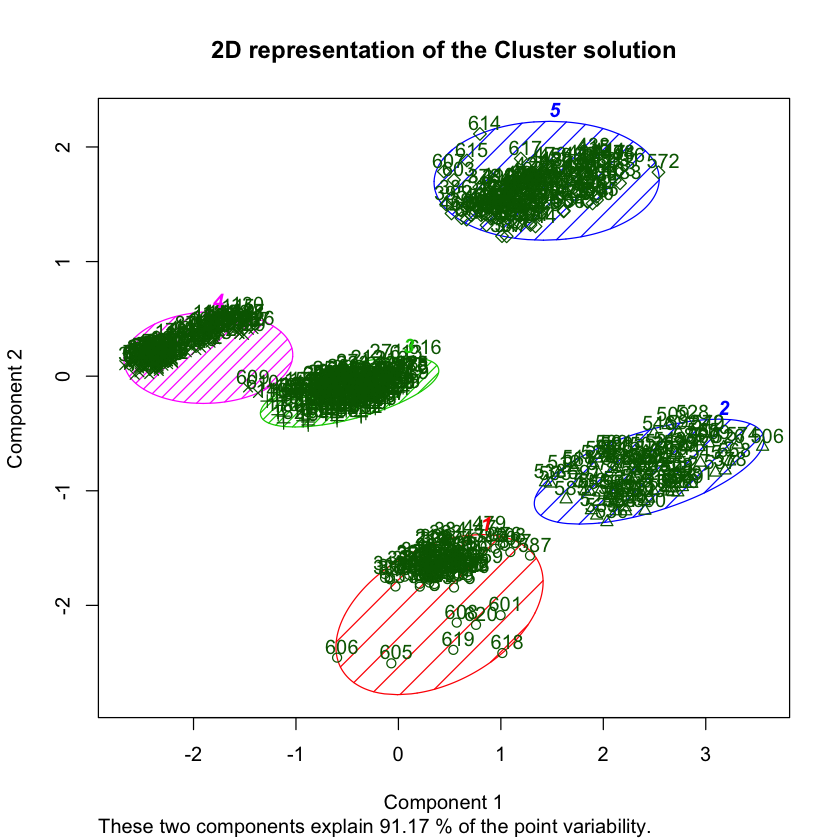

In [16]:
library(cluster)
clusplot(mydata, fit$cluster, main='2D representation of the Cluster solution',
         color=TRUE, shade=TRUE,
         labels=2, lines=0)